In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
%matplotlib inline 

import sys
sys.path.append("../")

from measureEccentricity.measureEccentricity import get_available_methods
from measureEccentricity import measure_eccentricity
from measureEccentricity.load_data import load_waveform

/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home1/md.shaikh/miniconda3/envs/eccimrct/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


In [2]:
%load_ext autoreload
%autoreload 2

### Working on ET waveforms

In [3]:
!ls /home1/md.shaikh/etask_force/ET_sims/

Eccq1.__0._0.__et0.5_D27_G80L_LFr_LB_NRPsi4_Strain_60modes.h5
Eccq1.__-0.25__-0.25__et0.1_D14_G80L_LFr_LB_NRPsi4_Strain_60modes.h5
Eccq1.__0.25__0.25__et0.2_D16_G80L_LFr_LB_NRPsi4_Strain_60modes.h5
Eccq1.__-0.5_-0.5__et0.1_D13_G80L_LFr_LB_NRPsi4_Strain_60modes.h5
Eccq1.__0.5_0.5__et0.2_D15_G80L_LFr_LB_NRPsi4_Strain_60modes.h5
Eccq1.__-0.75_-0.75__et0.1_D13_G80L_LFr_LB_NRPsi4_Strain_60modes.h5
Eccq1.__0.75_0.75__et0.2_D15_G80L_LFr_LB_NRPsi4_Strain_60modes.h5
Ecc_q2._0_0_0_0_0_0_et0.2_D16_G80L_LFr_LB_NRPsi4_Strain_60modes.h5
Eccq2.__0._0.__et0.5_D26_G80L_LFr_LB_NRPsi4_Strain_60modes.h5
Ecc_q4._0_0_0_0_0_0_et0.1_D12_G80L_LFr_LB_NRPsi4_Strain_60modes.h5
Ecc_q4._0_0_0_0_0_0_et0.2_D15_G80L_LFr_LB_NRPsi4_Strain_60modes.h5
Ecc_q4_0_0_0_0_0_0_et0.5_D27.5_G80L_LFr_LB_NRPsi4_Strain_60modes.h5


In [4]:
?load_waveform

Signature: load_waveform(catalog='LAL', file=None, nr_modelist=[[2, 2]], **kwargs)
Docstring:
Load waveform from file or LAL

parameters:
----------
catalog:
      Waveform type. could be one of 'LAL', 'EOB', 'SXS', 'ET'

file:
     Path to file for waveform to be read from a file. This is required for
     catalog other than 'LAL'

nr_modelist:
    List of modes to include when loading NR data from 'SXS' or 'ET'

**kwargs:
    Keywords to generate LAL waveform.
File:      ~/Eccentricity/measureEccentricity/load_data.py
Type:      function


In [5]:
ETFiles = glob.glob("/home1/md.shaikh/etask_force/ET_sims/*.h5")

In [6]:
ETFiles

['/home1/md.shaikh/etask_force/ET_sims/Eccq1.__0.25__0.25__et0.2_D16_G80L_LFr_LB_NRPsi4_Strain_60modes.h5',
 '/home1/md.shaikh/etask_force/ET_sims/Eccq1.__0._0.__et0.5_D27_G80L_LFr_LB_NRPsi4_Strain_60modes.h5',
 '/home1/md.shaikh/etask_force/ET_sims/Ecc_q4._0_0_0_0_0_0_et0.1_D12_G80L_LFr_LB_NRPsi4_Strain_60modes.h5',
 '/home1/md.shaikh/etask_force/ET_sims/Eccq1.__0.75_0.75__et0.2_D15_G80L_LFr_LB_NRPsi4_Strain_60modes.h5',
 '/home1/md.shaikh/etask_force/ET_sims/Ecc_q4_0_0_0_0_0_0_et0.5_D27.5_G80L_LFr_LB_NRPsi4_Strain_60modes.h5',
 '/home1/md.shaikh/etask_force/ET_sims/Eccq1.__-0.75_-0.75__et0.1_D13_G80L_LFr_LB_NRPsi4_Strain_60modes.h5',
 '/home1/md.shaikh/etask_force/ET_sims/Eccq1.__-0.25__-0.25__et0.1_D14_G80L_LFr_LB_NRPsi4_Strain_60modes.h5',
 '/home1/md.shaikh/etask_force/ET_sims/Ecc_q2._0_0_0_0_0_0_et0.2_D16_G80L_LFr_LB_NRPsi4_Strain_60modes.h5',
 '/home1/md.shaikh/etask_force/ET_sims/Eccq1.__-0.5_-0.5__et0.1_D13_G80L_LFr_LB_NRPsi4_Strain_60modes.h5',
 '/home1/md.shaikh/etask_force/

In [7]:
dataDict = load_waveform("ET", ETFiles[0])

In [8]:
dataDict

{'t': array([-2454.054912, -2453.892864, -2453.730816, ...,   247.609344,
          247.771392,   247.93344 ]),
 'hlm': {(2,
   2): array([ 0.13190837+0.02163632j,  0.13217572+0.02061446j,
          0.13243512+0.0195892j , ..., -0.00059329+0.00061691j,
         -0.00059242+0.00061871j, -0.00059154+0.00062047j])},
 'tHorizon': None,
 'amplm': {(2,
   2): array([0.13367105, 0.1337736 , 0.13387605, ..., 0.0008559 , 0.00085659,
         0.00085727])},
 'phaselm': {(2,
   2): array([ 1.62577648e-01,  1.54716107e-01,  1.46850619e-01, ...,
         -2.11291622e+02, -2.11293811e+02, -2.11295975e+02])},
 'omegalm': {(2,
   2): array([-0.04850142, -0.04852586, -0.04855013, ..., -0.01357137,
         -0.013433  , -0.01326621])},
 'om_orb': None,
 'phase_orb': None}

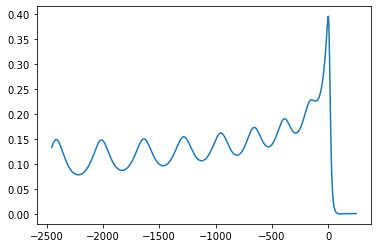

In [9]:
plt.plot(dataDict["t"], np.abs(dataDict["hlm"][(2, 2)]))

In [10]:
?measure_eccentricity

Signature:
measure_eccentricity(
    tref_in,
    dataDict,
    method='Amplitude',
    return_ecc_method=False,
    extrema_finding_keywords=None,
    spline_keywords=None,
    extra_keywprds=None,
)
Docstring:
Measure eccentricity and mean anomaly at reference time.

parameters:
----------
tref_in:
    Input Reference time at which to measure eccentricity and mean anomaly.
    Can be a single float or an array.

dataDict:
    Dictionary containing waveform modes dict, time etc.
    Should follow the format:
        {"t": time, "hlm": modeDict, ...}
        with modeDict = {(l1, m1): h_{l1, m1},
                         (l2, m2): h_{l2, m2}, ...
                        }.
    Some methods may need extra data. For example, the ResidualAmplitude
    method, requires "t_zeroecc" and "hlm_zeroecc" as well in dataDict.

method:
    method to define eccentricity. See get_available_methods for available
    methods.

return_ecc_method:
    If true, returns the method object used to compute t

In [12]:
tref_vec = np.arange(-2000, -400)
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_vec, dataDict,"Amplitude", 
                                                        return_ecc_method=True,
                                                        spline_keywords={"k": 3},
                                                        extrema_finding_keywords={"width": 500})

In [13]:
eccMethod.omega22

array([0.04851366, 0.04852583, 0.0485501 , ..., 0.01356664, 0.01342826,
       0.01335197])

In [14]:
eccMethod.phase22

array([-1.62577648e-01, -1.54716107e-01, -1.46850619e-01, ...,
        2.11291622e+02,  2.11293811e+02,  2.11295975e+02])

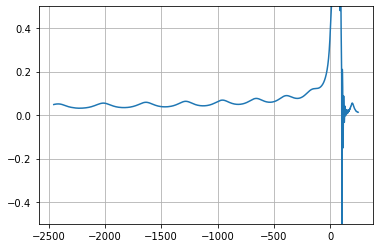

In [15]:
plt.plot(eccMethod.t, eccMethod.omega22)
plt.ylim(-0.5, 0.5)
plt.grid()

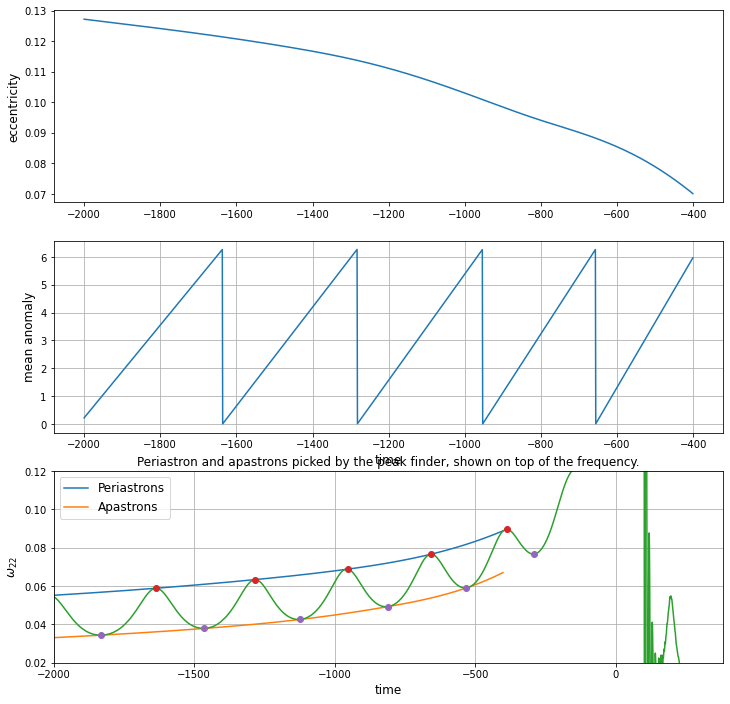

In [16]:
fig, axarr = plt.subplots(nrows=3, figsize=(12, 12))
axarr[0].plot(tref_out, ecc_vec)
axarr[1].plot(tref_out, mean_ano_vec)
axarr[1].set_xlabel("time", fontsize=12)
axarr[0].set_ylabel("eccentricity", fontsize=12)
axarr[1].set_ylabel("mean anomaly", fontsize=12)
axarr[1].grid()

axarr[2].plot(tref_out, eccMethod.omega_peak_at_tref_out, label='Periastrons')
axarr[2].plot(tref_out, eccMethod.omega_trough_at_tref_out, label='Apastrons')
axarr[2].plot(eccMethod.t, eccMethod.omega22)
axarr[2].plot(eccMethod.t[eccMethod.peaks_location], eccMethod.omega22[eccMethod.peaks_location], marker="o", ls="")
axarr[2].plot(eccMethod.t[eccMethod.troughs_location], eccMethod.omega22[eccMethod.troughs_location], marker="o", ls="")

axarr[2].set_ylim(0.02, 0.12)
axarr[2].set_xlim(min(tref_vec),)
axarr[2].set_xlabel("time", fontsize=12)
axarr[2].set_ylabel("$\omega_{22}$", fontsize=12)
axarr[2].grid()
axarr[2].legend(fontsize=12)
axarr[2].set_title('Periastron and apastrons picked by the peak finder, '
          'shown on top of the frequency.', fontsize=12);

### Working on SXS waveform

In [17]:
SXS_Files = glob.glob("/home1/md.shaikh/etask_force/AEI_sxs_sims/*.h5")

In [18]:
SXS_Files

['/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SKS_q1.1_-0.4_-0.7_e05_D28_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q4_e095_D65_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q10_e01_D16_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q4_e035_D26_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q6_e01_D18_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SKS_q1.1_-0.4_-0.7_e025_D22_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q6_e02_D20_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SKS_q10_-0.75_0_e05_D28_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q1_e09_D70_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q8_e02_D20_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q3_e02_D17.3_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q4_e04_D28_Res3.h5',
 '/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q6_e095_D65_Res3.h5',
 '/home1/md

In [19]:
dataDictSXS = load_waveform("SXS", SXS_Files[3])
SXS_Files[3]

'/home1/md.shaikh/etask_force/AEI_sxs_sims/BBH_SHK_q4_e035_D26_Res3.h5'

In [20]:
tref_vec = np.arange(-2000, -100)
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_vec, dataDictSXS,"Amplitude",
                                                        return_ecc_method=True,
                                                        spline_keywords={"k": 3},
                                                        extrema_finding_keywords={"width": 200})

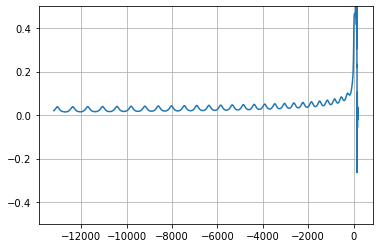

In [21]:
plt.plot(eccMethod.t, eccMethod.omega22)
plt.ylim(-0.5, 0.5)
plt.grid()

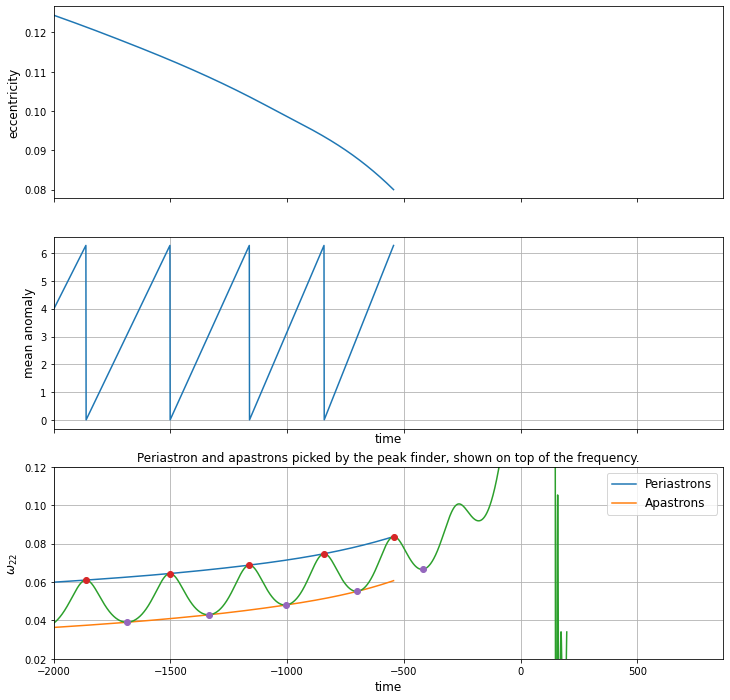

In [24]:
fig, axarr = plt.subplots(nrows=3, figsize=(12, 12), sharex=True)
axarr[0].plot(tref_out, ecc_vec)
axarr[1].plot(tref_out, mean_ano_vec)
axarr[1].set_xlabel("time", fontsize=12)
axarr[0].set_ylabel("eccentricity", fontsize=12)
axarr[1].set_ylabel("mean anomaly", fontsize=12)
axarr[1].grid()

axarr[2].plot(tref_out, eccMethod.omega_peak_at_tref_out, label='Periastrons')
axarr[2].plot(tref_out, eccMethod.omega_trough_at_tref_out, label='Apastrons')
axarr[2].plot(eccMethod.t, eccMethod.omega22)
axarr[2].plot(eccMethod.t[eccMethod.peaks_location], eccMethod.omega22[eccMethod.peaks_location], marker="o", ls="")
axarr[2].plot(eccMethod.t[eccMethod.troughs_location], eccMethod.omega22[eccMethod.troughs_location], marker="o", ls="")

axarr[2].set_ylim(0.02, 0.12)
axarr[2].set_xlim(min(tref_vec),)
axarr[2].set_xlabel("time", fontsize=12)
axarr[2].set_ylabel("$\omega_{22}$", fontsize=12)
axarr[2].grid()
axarr[2].legend(fontsize=12)
axarr[2].set_title('Periastron and apastrons picked by the peak finder, '
          'shown on top of the frequency.', fontsize=12);

In [43]:
tref_out

array([-2000, -1999, -1998, ...,  -546,  -545,  -544])

### What happens if we set "exclude_num_orbit_before_merger" to 0 in "extra_keywords"

In [25]:
tref_vec = np.arange(-2000, -100)
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_vec, dataDictSXS,"Amplitude",
                                                        return_ecc_method=True,
                                                        spline_keywords={"k": 3},
                                                        extrema_finding_keywords={"width": 200},
                                                        extra_keywprds={"exclude_num_orbits_before_merger": 0})

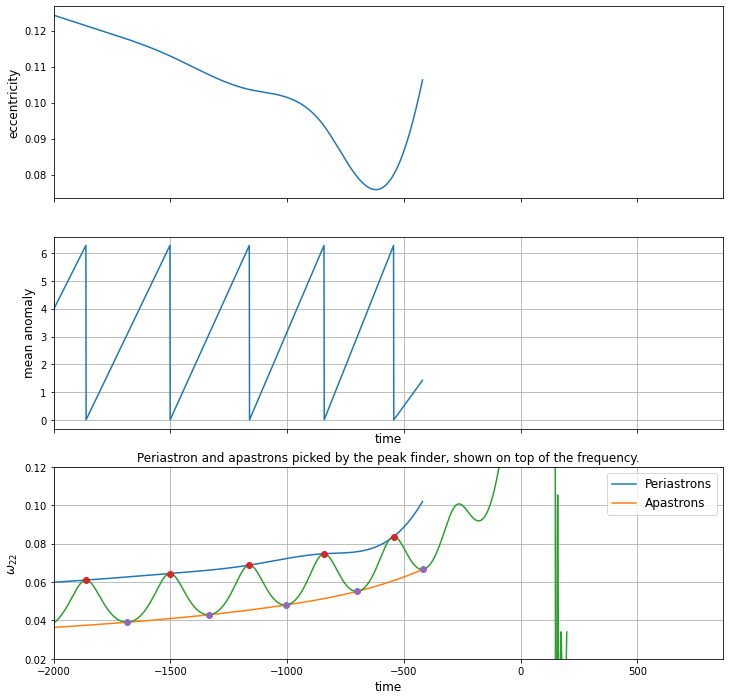

In [26]:
fig, axarr = plt.subplots(nrows=3, figsize=(12, 12), sharex=True)
axarr[0].plot(tref_out, ecc_vec)
axarr[1].plot(tref_out, mean_ano_vec)
axarr[1].set_xlabel("time", fontsize=12)
axarr[0].set_ylabel("eccentricity", fontsize=12)
axarr[1].set_ylabel("mean anomaly", fontsize=12)
axarr[1].grid()

axarr[2].plot(tref_out, eccMethod.omega_peak_at_tref_out, label='Periastrons')
axarr[2].plot(tref_out, eccMethod.omega_trough_at_tref_out, label='Apastrons')
axarr[2].plot(eccMethod.t, eccMethod.omega22)
axarr[2].plot(eccMethod.t[eccMethod.peaks_location], eccMethod.omega22[eccMethod.peaks_location], marker="o", ls="")
axarr[2].plot(eccMethod.t[eccMethod.troughs_location], eccMethod.omega22[eccMethod.troughs_location], marker="o", ls="")

axarr[2].set_ylim(0.02, 0.12)
axarr[2].set_xlim(min(tref_vec),)
axarr[2].set_xlabel("time", fontsize=12)
axarr[2].set_ylabel("$\omega_{22}$", fontsize=12)
axarr[2].grid()
axarr[2].legend(fontsize=12)
axarr[2].set_title('Periastron and apastrons picked by the peak finder, '
          'shown on top of the frequency.', fontsize=12);

As we can see the eccentricty measurement in -1000 to -500 is bad. This is due to the fact that if we include data upto the mearger then the interpolation tries to fit also the merger peak and does some over fitting or something like that. That's why we by default remove one orbit before merger.

In [27]:
tref_out

array([-2000, -1999, -1998, ...,  -422,  -421,  -420])

### What if "exclude_num_orbit_before_merger" is set to None

In [28]:
tref_vec = np.arange(-2000, -100)
tref_out, ecc_vec, mean_ano_vec, eccMethod = measure_eccentricity(tref_vec, dataDictSXS,"Amplitude",
                                                        return_ecc_method=True,
                                                        spline_keywords={"k": 3},
                                                        extrema_finding_keywords={"width": 200},
                                                        extra_keywprds={"exclude_num_orbits_before_merger": None})

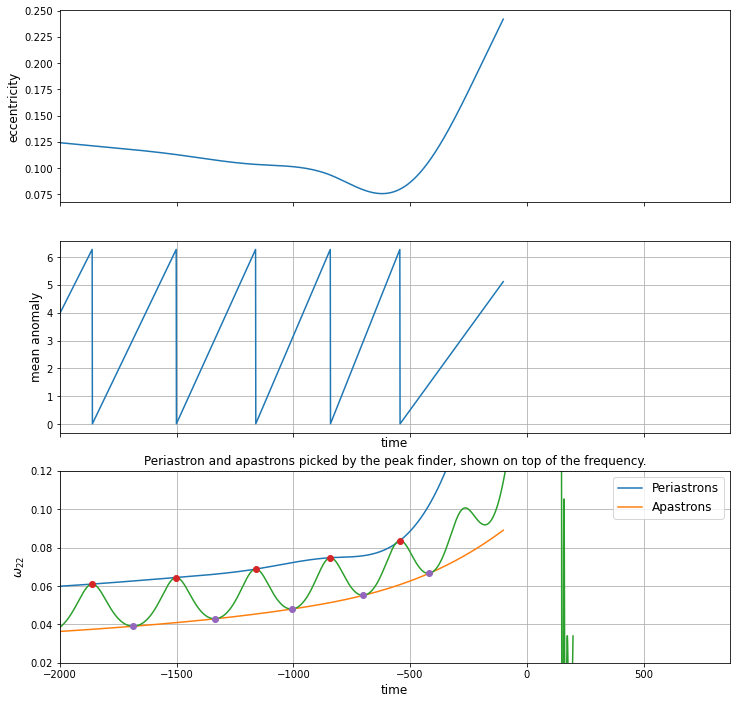

In [29]:
fig, axarr = plt.subplots(nrows=3, figsize=(12, 12), sharex=True)
axarr[0].plot(tref_out, ecc_vec)
axarr[1].plot(tref_out, mean_ano_vec)
axarr[1].set_xlabel("time", fontsize=12)
axarr[0].set_ylabel("eccentricity", fontsize=12)
axarr[1].set_ylabel("mean anomaly", fontsize=12)
axarr[1].grid()

axarr[2].plot(tref_out, eccMethod.omega_peak_at_tref_out, label='Periastrons')
axarr[2].plot(tref_out, eccMethod.omega_trough_at_tref_out, label='Apastrons')
axarr[2].plot(eccMethod.t, eccMethod.omega22)
axarr[2].plot(eccMethod.t[eccMethod.peaks_location], eccMethod.omega22[eccMethod.peaks_location], marker="o", ls="")
axarr[2].plot(eccMethod.t[eccMethod.troughs_location], eccMethod.omega22[eccMethod.troughs_location], marker="o", ls="")

axarr[2].set_ylim(0.02, 0.12)
axarr[2].set_xlim(min(tref_vec),)
axarr[2].set_xlabel("time", fontsize=12)
axarr[2].set_ylabel("$\omega_{22}$", fontsize=12)
axarr[2].grid()
axarr[2].legend(fontsize=12)
axarr[2].set_title('Periastron and apastrons picked by the peak finder, '
          'shown on top of the frequency.', fontsize=12);